In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [3]:
#get files
# Read in the GeoPackage file for 2009
file_path_2009 = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINAL_LAYERS\2009_digitized_pools1_Georectified_withU1.gpkg"
gdf_2009 = gpd.read_file(file_path_2009)

# Read in the GeoPackage file for 2021
file_path_2021 = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINAL_LAYERS\2021_FinalPools_withU1.gpkg"
gdf_2021 = gpd.read_file(file_path_2021)
gdf_2021

# File with marsh areas
file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\spreadsheets\Marsh_areas.xlsx"
# Read in the Excel file and assign it to marsh_areas variable
marsh_areas = pd.read_excel(file_path)

In [4]:
#add marsh number column
gdf_2021['marsh_number']=gdf_2021['ID'].str.extract(r'(\d+)')
gdf_2009['marsh_number']=gdf_2009['ID'].str.extract(r'(\d+)')
gdf_2009['marsh_number'].unique()

array(['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [5]:
# Group by marsh_number and PoolType, counting the number of occurrences
grouped_df = gdf_2021.groupby(['marsh_number', 'PoolType']).size().reset_index(name='count')

# Pivot the grouped DataFrame to create a new table
PercentCover21_table = grouped_df.pivot(index='marsh_number', columns='PoolType', values='count').fillna(0)

# Add new columns for counts of IP, MS, and PP pools
PercentCover21_table['IP_count_21'] = PercentCover21_table['IP']
PercentCover21_table['MS_count_21'] = PercentCover21_table['MS']
PercentCover21_table['PP_count_21'] = PercentCover21_table['PP']

# Sum the counts to get the total number of pools for each marsh
PercentCover21_table['Total_Pool_Count'] = PercentCover21_table['IP'] + PercentCover21_table['MS'] + PercentCover21_table['PP']

# Reset the index to convert 'marsh_number' from index to a column
PercentCover21_table.reset_index(inplace=True)

# Convert marsh_number to integer type (if needed)
PercentCover21_table['marsh_number'] = PercentCover21_table['marsh_number'].astype(int)

# Display the resulting pivot table with marsh_number as a column
print(PercentCover21_table)

PoolType  marsh_number      IP     MS     PP  IP_count_21  MS_count_21  \
0                    1  7037.0  198.0  110.0       7037.0        198.0   
1                   10   459.0   41.0    7.0        459.0         41.0   
2                   11   178.0   20.0   15.0        178.0         20.0   
3                   12    74.0   10.0    0.0         74.0         10.0   
4                    2  2827.0  105.0   38.0       2827.0        105.0   
5                    3  1009.0   41.0   14.0       1009.0         41.0   
6                    4   518.0   48.0   16.0        518.0         48.0   
7                    5    45.0   27.0    3.0         45.0         27.0   
8                    6   621.0   41.0   16.0        621.0         41.0   
9                    7   268.0   27.0    2.0        268.0         27.0   
10                   8   203.0   15.0    0.0        203.0         15.0   
11                   9    98.0   23.0    2.0         98.0         23.0   

PoolType  PP_count_21  Total_Pool_Cou

In [6]:
#add marsh areas to 21
# Convert marsh_number to integer in PercentCover21_table
PercentCover21_table['marsh_number'] = PercentCover21_table['marsh_number'].astype(int)
# Reset index of PercentCover21_table
PercentCover21_table.reset_index(inplace=True)

# Merge PercentCover21_table with marsh_areas based on marsh_number
merged_PercCovtable21 = pd.merge(PercentCover21_table, marsh_areas, on='marsh_number', how='left')

# Display the resulting merged DataFrame
print(merged_PercCovtable21)

    index  marsh_number      IP     MS     PP  IP_count_21  MS_count_21  \
0       0             1  7037.0  198.0  110.0       7037.0        198.0   
1       1            10   459.0   41.0    7.0        459.0         41.0   
2       2            11   178.0   20.0   15.0        178.0         20.0   
3       3            12    74.0   10.0    0.0         74.0         10.0   
4       4             2  2827.0  105.0   38.0       2827.0        105.0   
5       5             3  1009.0   41.0   14.0       1009.0         41.0   
6       6             4   518.0   48.0   16.0        518.0         48.0   
7       7             5    45.0   27.0    3.0         45.0         27.0   
8       8             6   621.0   41.0   16.0        621.0         41.0   
9       9             7   268.0   27.0    2.0        268.0         27.0   
10     10             8   203.0   15.0    0.0        203.0         15.0   
11     11             9    98.0   23.0    2.0         98.0         23.0   

    PP_count_21  Total_P

In [7]:
# Calculate percent cover for MS, IP, PP, and Total 21
merged_PercCovtable21['MS_CountPerArea21'] = (merged_PercCovtable21['MS'] / merged_PercCovtable21['marsh_area']*1000000)
merged_PercCovtable21['IP_CountPerArea21'] = (merged_PercCovtable21['IP'] / merged_PercCovtable21['marsh_area']*1000000)
merged_PercCovtable21['PP_CountPerArea21'] = (merged_PercCovtable21['PP'] / merged_PercCovtable21['marsh_area']*1000000) 
merged_PercCovtable21['Total_CountPerArea21'] = (merged_PercCovtable21['Total_Pool_Count'] / merged_PercCovtable21['marsh_area']) * 100

# Display the updated DataFrame with percent cover columns
print(merged_PercCovtable21)

    index  marsh_number      IP     MS     PP  IP_count_21  MS_count_21  \
0       0             1  7037.0  198.0  110.0       7037.0        198.0   
1       1            10   459.0   41.0    7.0        459.0         41.0   
2       2            11   178.0   20.0   15.0        178.0         20.0   
3       3            12    74.0   10.0    0.0         74.0         10.0   
4       4             2  2827.0  105.0   38.0       2827.0        105.0   
5       5             3  1009.0   41.0   14.0       1009.0         41.0   
6       6             4   518.0   48.0   16.0        518.0         48.0   
7       7             5    45.0   27.0    3.0         45.0         27.0   
8       8             6   621.0   41.0   16.0        621.0         41.0   
9       9             7   268.0   27.0    2.0        268.0         27.0   
10     10             8   203.0   15.0    0.0        203.0         15.0   
11     11             9    98.0   23.0    2.0         98.0         23.0   

    PP_count_21  Total_P

In [8]:
# Remove the last four characters from marsh_name column
merged_PercCovtable21['marsh_name'] = merged_PercCovtable21['marsh_name'].apply(lambda x: x[:-4])

# Display the updated DataFrame with modified marsh_name column
print(merged_PercCovtable21)

    index  marsh_number      IP     MS     PP  IP_count_21  MS_count_21  \
0       0             1  7037.0  198.0  110.0       7037.0        198.0   
1       1            10   459.0   41.0    7.0        459.0         41.0   
2       2            11   178.0   20.0   15.0        178.0         20.0   
3       3            12    74.0   10.0    0.0         74.0         10.0   
4       4             2  2827.0  105.0   38.0       2827.0        105.0   
5       5             3  1009.0   41.0   14.0       1009.0         41.0   
6       6             4   518.0   48.0   16.0        518.0         48.0   
7       7             5    45.0   27.0    3.0         45.0         27.0   
8       8             6   621.0   41.0   16.0        621.0         41.0   
9       9             7   268.0   27.0    2.0        268.0         27.0   
10     10             8   203.0   15.0    0.0        203.0         15.0   
11     11             9    98.0   23.0    2.0         98.0         23.0   

    PP_count_21  Total_P

In [9]:
# Group by marsh_number and PoolType, counting the number of occurrences
grouped_df = gdf_2009.groupby(['marsh_number', 'PoolType']).size().reset_index(name='count')

# Pivot the grouped DataFrame to create a new table
PercentCover09_table = grouped_df.pivot(index='marsh_number', columns='PoolType', values='count').fillna(0)

# Add new columns for counts of IP, MS, and PP pools
PercentCover09_table['IP_count_09'] = PercentCover09_table['IP']
PercentCover09_table['MS_count_09'] = PercentCover09_table['MS']
PercentCover09_table['PP_count_09'] = PercentCover09_table['PP']

# Sum the counts to get the total number of pools for each marsh
PercentCover09_table['Total_Pool_Count09'] = PercentCover09_table['IP'] + PercentCover09_table['MS'] + PercentCover09_table['PP']

# Reset the index to convert 'marsh_number' from index to a column
PercentCover09_table.reset_index(inplace=True)

# Convert marsh_number to integer type (if needed)
PercentCover09_table['marsh_number'] = PercentCover09_table['marsh_number'].astype(int)

# Display the resulting pivot table with marsh_number as a column
print(PercentCover09_table)

PoolType  marsh_number      IP     MS    PP  IP_count_09  MS_count_09  \
0                    1  4587.0  166.0  59.0       4587.0        166.0   
1                   10   317.0   34.0   4.0        317.0         34.0   
2                   11    94.0   13.0   8.0         94.0         13.0   
3                   12    74.0    8.0   0.0         74.0          8.0   
4                    2  2576.0  108.0  35.0       2576.0        108.0   
5                    3   902.0   33.0  15.0        902.0         33.0   
6                    4   383.0   41.0  15.0        383.0         41.0   
7                    5    59.0   20.0   3.0         59.0         20.0   
8                    6   512.0   33.0  21.0        512.0         33.0   
9                    7   172.0   24.0   0.0        172.0         24.0   
10                   8   143.0   12.0   0.0        143.0         12.0   
11                   9    66.0   17.0   2.0         66.0         17.0   

PoolType  PP_count_09  Total_Pool_Count09  
0     

In [10]:
#add marsh areas to 09
# Convert marsh_number to integer in PercentCover21_table
PercentCover09_table['marsh_number'] = PercentCover09_table['marsh_number'].astype(int)
# Reset index of PercentCover21_table
PercentCover09_table.reset_index(inplace=True)

# Merge PercentCover09_table with marsh_areas based on marsh_number
merged_PercCovtable09 = pd.merge(PercentCover09_table, marsh_areas, on='marsh_number', how='left')

# Display the resulting merged DataFrame
print(merged_PercCovtable09)


    index  marsh_number      IP     MS    PP  IP_count_09  MS_count_09  \
0       0             1  4587.0  166.0  59.0       4587.0        166.0   
1       1            10   317.0   34.0   4.0        317.0         34.0   
2       2            11    94.0   13.0   8.0         94.0         13.0   
3       3            12    74.0    8.0   0.0         74.0          8.0   
4       4             2  2576.0  108.0  35.0       2576.0        108.0   
5       5             3   902.0   33.0  15.0        902.0         33.0   
6       6             4   383.0   41.0  15.0        383.0         41.0   
7       7             5    59.0   20.0   3.0         59.0         20.0   
8       8             6   512.0   33.0  21.0        512.0         33.0   
9       9             7   172.0   24.0   0.0        172.0         24.0   
10     10             8   143.0   12.0   0.0        143.0         12.0   
11     11             9    66.0   17.0   2.0         66.0         17.0   

    PP_count_09  Total_Pool_Count09  

In [11]:
# Calculate percent cover for MS, IP, PP, and Total 09
merged_PercCovtable09['MS_CountPerArea09'] = (merged_PercCovtable09['MS'] / merged_PercCovtable09['marsh_area']*1000000) 
merged_PercCovtable09['IP_CountPerArea09'] = (merged_PercCovtable09['IP'] / merged_PercCovtable09['marsh_area']*1000000) 
merged_PercCovtable09['PP_CountPerArea09'] = (merged_PercCovtable09['PP'] / merged_PercCovtable09['marsh_area']*1000000) 
merged_PercCovtable09['Total_CountPerArea09'] = (merged_PercCovtable09['Total_Pool_Count09'] / merged_PercCovtable09['marsh_area']) * 100

# Display the updated DataFrame with percent cover columns
print(merged_PercCovtable09)

    index  marsh_number      IP     MS    PP  IP_count_09  MS_count_09  \
0       0             1  4587.0  166.0  59.0       4587.0        166.0   
1       1            10   317.0   34.0   4.0        317.0         34.0   
2       2            11    94.0   13.0   8.0         94.0         13.0   
3       3            12    74.0    8.0   0.0         74.0          8.0   
4       4             2  2576.0  108.0  35.0       2576.0        108.0   
5       5             3   902.0   33.0  15.0        902.0         33.0   
6       6             4   383.0   41.0  15.0        383.0         41.0   
7       7             5    59.0   20.0   3.0         59.0         20.0   
8       8             6   512.0   33.0  21.0        512.0         33.0   
9       9             7   172.0   24.0   0.0        172.0         24.0   
10     10             8   143.0   12.0   0.0        143.0         12.0   
11     11             9    66.0   17.0   2.0         66.0         17.0   

    PP_count_09  Total_Pool_Count09  

In [12]:
# Remove the last four characters from marsh_name column
merged_PercCovtable09['marsh_name'] = merged_PercCovtable09['marsh_name'].apply(lambda x: x[:-4])

# Display the updated DataFrame with modified marsh_name column
print(merged_PercCovtable09)

    index  marsh_number      IP     MS    PP  IP_count_09  MS_count_09  \
0       0             1  4587.0  166.0  59.0       4587.0        166.0   
1       1            10   317.0   34.0   4.0        317.0         34.0   
2       2            11    94.0   13.0   8.0         94.0         13.0   
3       3            12    74.0    8.0   0.0         74.0          8.0   
4       4             2  2576.0  108.0  35.0       2576.0        108.0   
5       5             3   902.0   33.0  15.0        902.0         33.0   
6       6             4   383.0   41.0  15.0        383.0         41.0   
7       7             5    59.0   20.0   3.0         59.0         20.0   
8       8             6   512.0   33.0  21.0        512.0         33.0   
9       9             7   172.0   24.0   0.0        172.0         24.0   
10     10             8   143.0   12.0   0.0        143.0         12.0   
11     11             9    66.0   17.0   2.0         66.0         17.0   

    PP_count_09  Total_Pool_Count09  

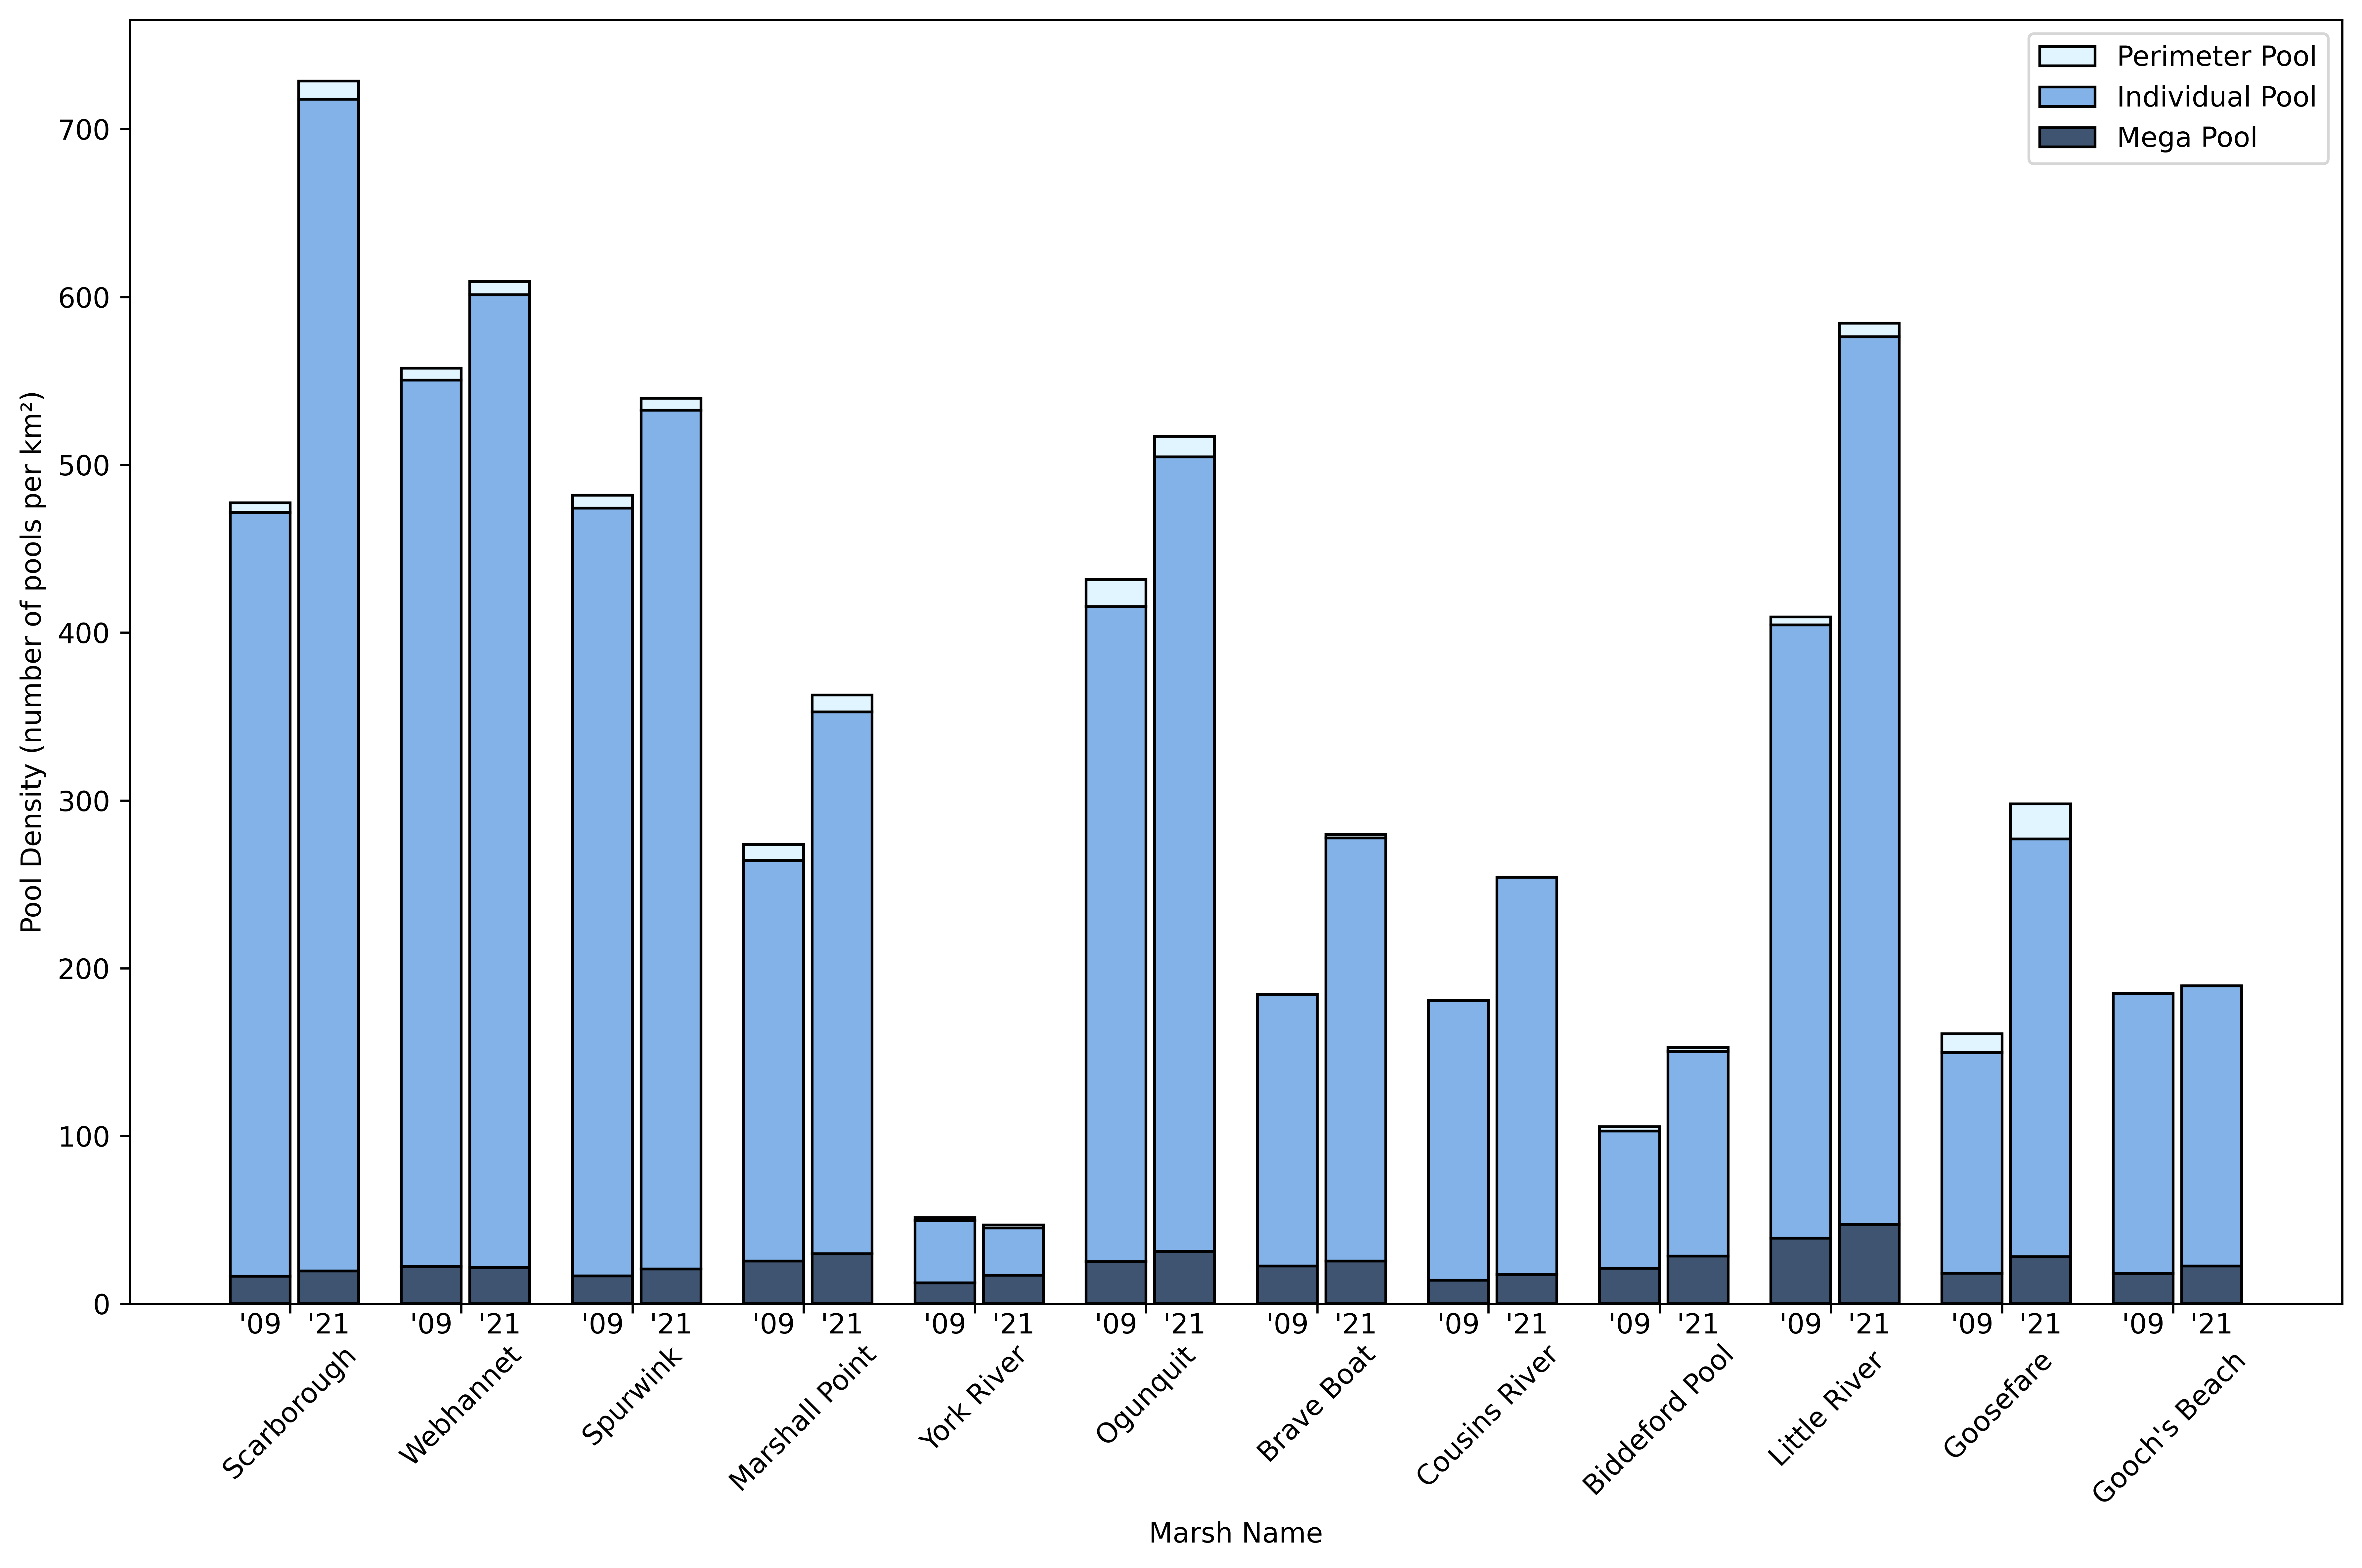

In [13]:
# THIS GRAPH MAKES POOL COUNT FOR PAPER

# Sort merged_PercCovtable09 by marsh_number
merged_PercCovtable09_sorted = merged_PercCovtable09.sort_values(by='marsh_number')

# Sort merged_PercCovtable21 by marsh_number
merged_PercCovtable21_sorted = merged_PercCovtable21.sort_values(by='marsh_number')

# Extract marsh names and corresponding count per area values for each category after sorting
marsh_names = merged_PercCovtable09_sorted['marsh_name']
ip_count_09 = merged_PercCovtable09_sorted['IP_CountPerArea09']
ms_count_09 = merged_PercCovtable09_sorted['MS_CountPerArea09']
pp_count_09 = merged_PercCovtable09_sorted['PP_CountPerArea09']

ip_count_21 = merged_PercCovtable21_sorted['IP_CountPerArea21']
ms_count_21 = merged_PercCovtable21_sorted['MS_CountPerArea21']
pp_count_21 = merged_PercCovtable21_sorted['PP_CountPerArea21']

# Set the width of the bars and the gap between bars
bar_width = 0.35
bar_gap = 0.05

# Set position of bar on X axis
r1 = np.arange(len(marsh_names))
r2 = [x + bar_width + bar_gap for x in r1]

# Create the figure and set the size with correct DPI
plt.figure(figsize=(12, 8), dpi=600)

# Plotting the bars for 2009 data
p1 = plt.bar(r1, ms_count_09, color='#3f5471', width=bar_width, label='MS 2009', edgecolor='black')
p2 = plt.bar(r1, ip_count_09, color='#83b2e9', width=bar_width, label='IP 2009', bottom=ms_count_09, edgecolor='black')
p3 = plt.bar(r1, pp_count_09, color='#e0f5ff', width=bar_width, label='PP 2009', bottom=ms_count_09 + ip_count_09, edgecolor='black')

# Plotting the bars for 2021 data
p4 = plt.bar(r2, ms_count_21, color='#3f5471', width=bar_width, edgecolor='black')  # MS 2021 without label
p5 = plt.bar(r2, ip_count_21, color='#83b2e9', width=bar_width, bottom=ms_count_21, edgecolor='black')  # IP 2021 without label
p6 = plt.bar(r2, pp_count_21, color='#e0f5ff', width=bar_width, bottom=ms_count_21 + ip_count_21, edgecolor='black')  # PP 2021 without label

# Add labels for years below each bar (2009 and 2021)
for bar, label in zip(p1 + p2 + p3, ['\'09'] * len(r1)):
    plt.text(bar.get_x() + bar.get_width() / 2, -5, label, ha='center', va='top', fontsize=10)
for bar, label in zip(p4 + p5 + p6, ['\'21'] * len(r2)):
    plt.text(bar.get_x() + bar.get_width() / 2, -5, label, ha='center', va='top', fontsize=10)

# Customize legend labels for 2009 only with desired order (Perimeter Pool at top, Individual Pool in middle, Mega Pool at bottom)
legend_labels = ['Perimeter Pool', 'Individual Pool', 'Mega Pool']
handles = [p3[0], p2[0], p1[0]]  # Reorder handles to match desired legend order

# Create legend with customized labels and handles
plt.legend(handles, legend_labels)

# Add labels, title, and legend
plt.xlabel('Marsh Name')
plt.ylabel('Pool Density (number of pools per km²)')  # Update ylabel to include "km²"
plt.xticks([r + bar_width / 2 for r in range(len(marsh_names))], marsh_names, rotation=45, ha='center', va='top')  # Rotate labels for better visibility
plt.tick_params(axis='x', which='major', pad=10)

# Show plot
plt.tight_layout()  # Adjust layout for better spacing


# Specify the file path where you want to save the figure
file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Manuscript\Figures_final\poolcount\PoolCountGraph.png"

# Save the plot to the specified file path
plt.savefig(file_path, dpi=600)  # Save the plot with high DPI (dots per inch)

# Display the plot (optional)
plt.show()

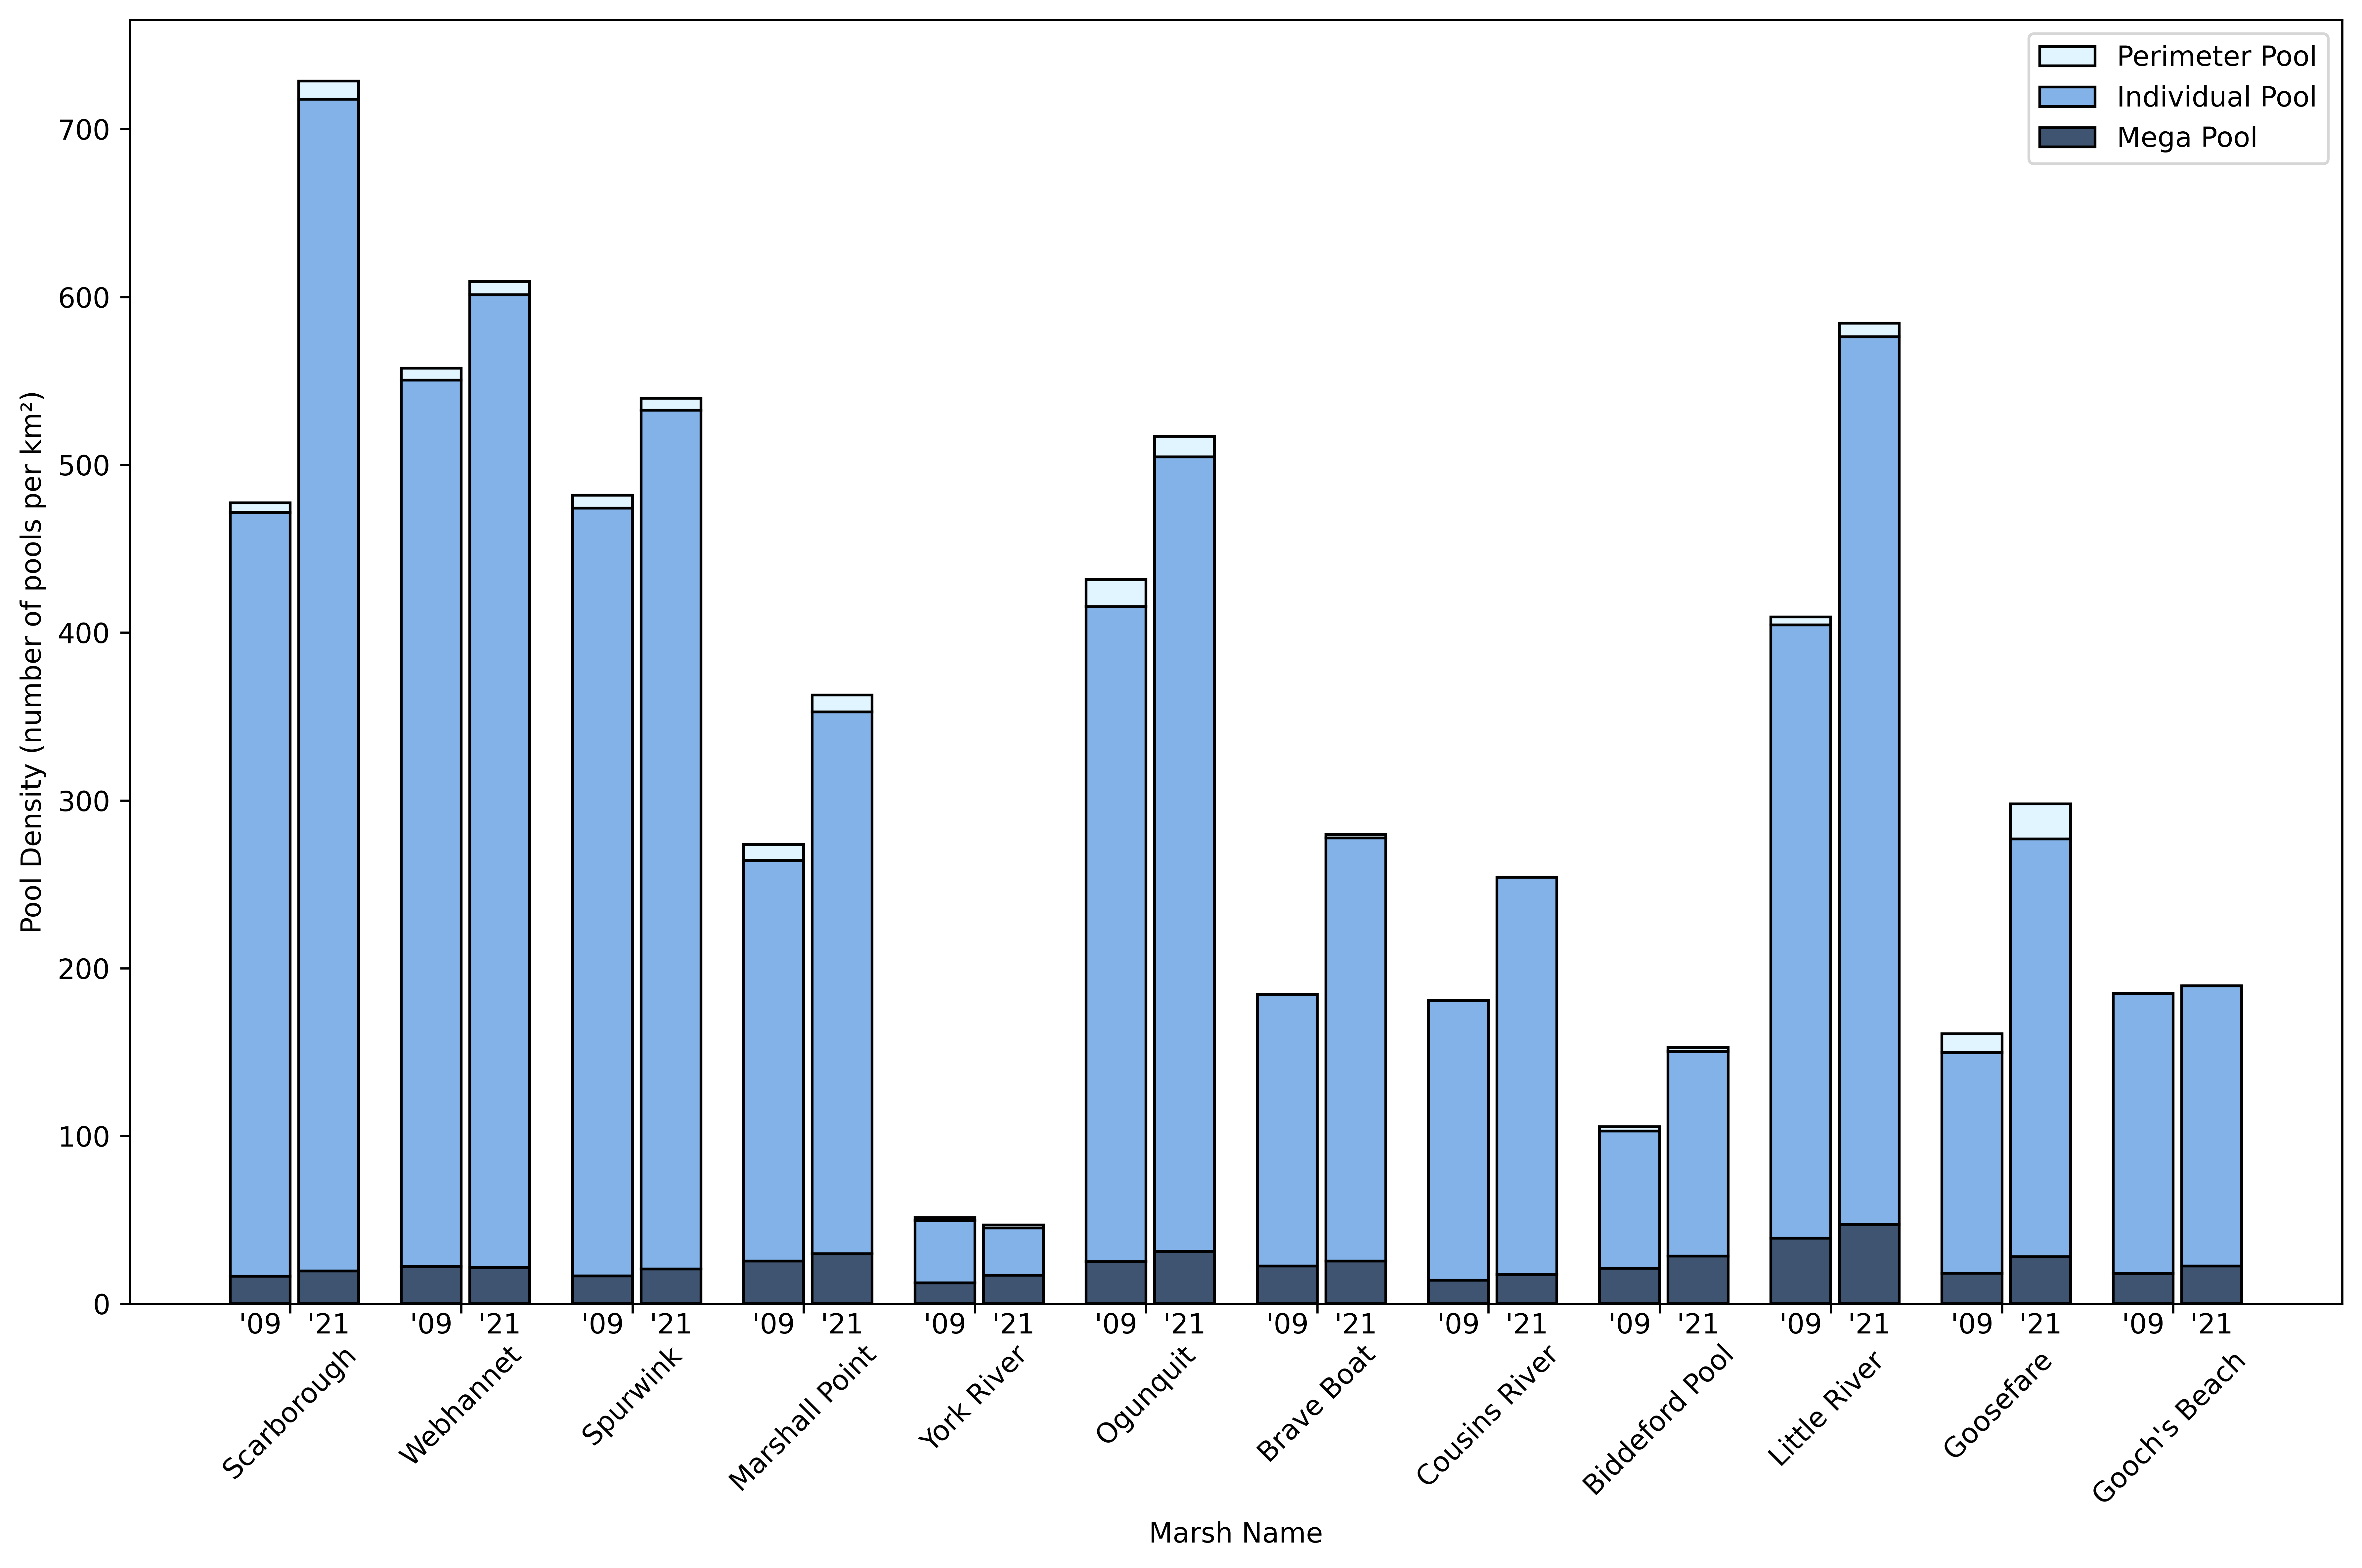

In [14]:
# THIS GRAPH MAKES POOL COUNT FOR PAPER

# Sort merged_PercCovtable09 by marsh_number
merged_PercCovtable09_sorted = merged_PercCovtable09.sort_values(by='marsh_number')

# Sort merged_PercCovtable21 by marsh_number
merged_PercCovtable21_sorted = merged_PercCovtable21.sort_values(by='marsh_number')

# Extract marsh names and corresponding count per area values for each category after sorting
marsh_names = merged_PercCovtable09_sorted['marsh_name']
ip_count_09 = merged_PercCovtable09_sorted['IP_CountPerArea09']
ms_count_09 = merged_PercCovtable09_sorted['MS_CountPerArea09']
pp_count_09 = merged_PercCovtable09_sorted['PP_CountPerArea09']

ip_count_21 = merged_PercCovtable21_sorted['IP_CountPerArea21']
ms_count_21 = merged_PercCovtable21_sorted['MS_CountPerArea21']
pp_count_21 = merged_PercCovtable21_sorted['PP_CountPerArea21']

# Set the width of the bars and the gap between bars
bar_width = 0.35
bar_gap = 0.05

# Set position of bar on X axis
r1 = np.arange(len(marsh_names))
r2 = [x + bar_width + bar_gap for x in r1]

# Create the figure and set the size with correct DPI
plt.figure(figsize=(12, 8), dpi=600)

# Plotting the bars for 2009 data
p1 = plt.bar(r1, ms_count_09, color='#3f5471', width=bar_width, label='MS 2009', edgecolor='black')
p2 = plt.bar(r1, ip_count_09, color='#83b2e9', width=bar_width, label='IP 2009', bottom=ms_count_09, edgecolor='black')
p3 = plt.bar(r1, pp_count_09, color='#e0f5ff', width=bar_width, label='PP 2009', bottom=ms_count_09 + ip_count_09, edgecolor='black')

# Plotting the bars for 2021 data
p4 = plt.bar(r2, ms_count_21, color='#3f5471', width=bar_width, edgecolor='black')  # MS 2021 without label
p5 = plt.bar(r2, ip_count_21, color='#83b2e9', width=bar_width, bottom=ms_count_21, edgecolor='black')  # IP 2021 without label
p6 = plt.bar(r2, pp_count_21, color='#e0f5ff', width=bar_width, bottom=ms_count_21 + ip_count_21, edgecolor='black')  # PP 2021 without label

# Add labels for years below each bar (2009 and 2021)
for bar, label in zip(p1 + p2 + p3, ['\'09'] * len(r1)):
    plt.text(bar.get_x() + bar.get_width() / 2, -5, label, ha='center', va='top', fontsize=10)
for bar, label in zip(p4 + p5 + p6, ['\'21'] * len(r2)):
    plt.text(bar.get_x() + bar.get_width() / 2, -5, label, ha='center', va='top', fontsize=10)

# Customize legend labels for 2009 only with desired order (Perimeter Pool at top, Individual Pool in middle, Mega Pool at bottom)
legend_labels = ['Perimeter Pool', 'Individual Pool', 'Mega Pool']
handles = [p3[0], p2[0], p1[0]]  # Reorder handles to match desired legend order

# Create legend with customized labels and handles
plt.legend(handles, legend_labels)

# Add labels, title, and legend
plt.xlabel('Marsh Name')
plt.ylabel('Pool Density (number of pools per km²)')  # Update ylabel to include "km²"
plt.xticks([r + bar_width / 2 for r in range(len(marsh_names))], marsh_names, rotation=45, ha='center', va='top')  # Rotate labels for better visibility
plt.tick_params(axis='x', which='major', pad=10)

# Show plot
plt.tight_layout()  # Adjust layout for better spacing


# Specify the file path where you want to save the figure
file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Manuscript\Figures_final\poolcount\PoolCountGraph.png"

# Save the plot to the specified file path
plt.savefig(file_path, dpi=600)  # Save the plot with high DPI (dots per inch)

# Display the plot (optional)
plt.show()